# 1. Problem 1

## 1. d i

In [ ]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
# define objective function and subgradient 
def objective_function(A, x, y, la): 
  return 0.5 * np.linalg.norm(y - A@x)**2 + la * np.linalg.norm(x, ord=1)

def sub_grdient(x, value):
  data = x.copy() 
  data[data > 0] = 1
  data[data < 0] = -1
  temp  = value if value else rng.uniform(low=-1, high=1, size = 1 )
  return   np.where(data == 0, temp , data)


def objective_function_gradient(A, x, y, la, value):
  return  A.T.dot(A@x - y) + la*sub_grdient(x, value) 


In [ ]:
def train(A, x, x0,  y, la, value=0.6, threshold=1e-4, step_size=1e-3):

  
  delta = np.abs(objective_function(A, x, y, la)) 

  k=1
  while delta > threshold: 

    last = objective_function(A, x, y, la)

    x -=  (step_size/np.square(k)) *  objective_function_gradient(A, x, y, la, value)

    current = objective_function(A, x, y, la) 
    delta = np.abs(current - last)  

    if (k-1) % 500 == 0: 

      loss = np.linalg.norm(x - x0)**2

      print(f"Iter {k} Loss: {loss}")    
    
    k +=1
  return x 

In [ ]:
rng = np.random.default_rng(seed=42)
N, d, p = 30, 100, .2
A = rng.standard_normal(size = (N, d))
epsilon = rng.normal(loc=0, scale=.5, size=(N, 1))
x0 = rng.binomial(1, p , d).reshape(d, -1)
y = A.dot(x0) + epsilon


Try $\lambda = 10, 1, 1e-2$. Get best performace when $\lambda = 1e-2$

In [ ]:
lambda_values = [10, 1, 1e-2]

x_values = [] 
for lambda_value in lambda_values:
  x = np.zeros(shape=(100,1)) 
  x = train(A, x, x0, y, lambda_value, value= None, threshold=1e-4,  step_size=1)
  x_values.append(x)
  print(f'lambda value: {lambda_value} End\n')

Iter 1 Loss: 82203.28891718033
Iter 501 Loss: 4013.7469811206283
Iter 1001 Loss: 4003.2400657485628
Iter 1501 Loss: 3999.734407408353
Iter 2001 Loss: 3997.980961141197
Iter 2501 Loss: 3996.9286943719126
Iter 3001 Loss: 3996.2270998619256
Iter 3501 Loss: 3995.7259166650724
Iter 4001 Loss: 3995.350007462291
Iter 4501 Loss: 3995.05762268272
Iter 5001 Loss: 3994.8237047299717
Iter 5501 Loss: 3994.6323132490543
Iter 6001 Loss: 3994.4728153253595
Iter 6501 Loss: 3994.3378529168554
Iter 7001 Loss: 3994.222168935202
Iter 7501 Loss: 3994.1219080491837
Iter 8001 Loss: 3994.034178679282
Iter 8501 Loss: 3993.9567701157935
lambda value: 10 End

Iter 1 Loss: 84605.04231233979
Iter 501 Loss: 34.81136623588204
Iter 1001 Loss: 34.727832446839884
lambda value: 1 End

Iter 1 Loss: 83675.35169695459
Iter 501 Loss: 11.557893367246884
lambda value: 0.01 End



<StemContainer object of 3 artists>

<StemContainer object of 3 artists>

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, '$\\lambda = 10$')

<StemContainer object of 3 artists>

<StemContainer object of 3 artists>

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, '$\\lambda = 1$')

<StemContainer object of 3 artists>

<StemContainer object of 3 artists>

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, '$\\lambda = 0.01$')

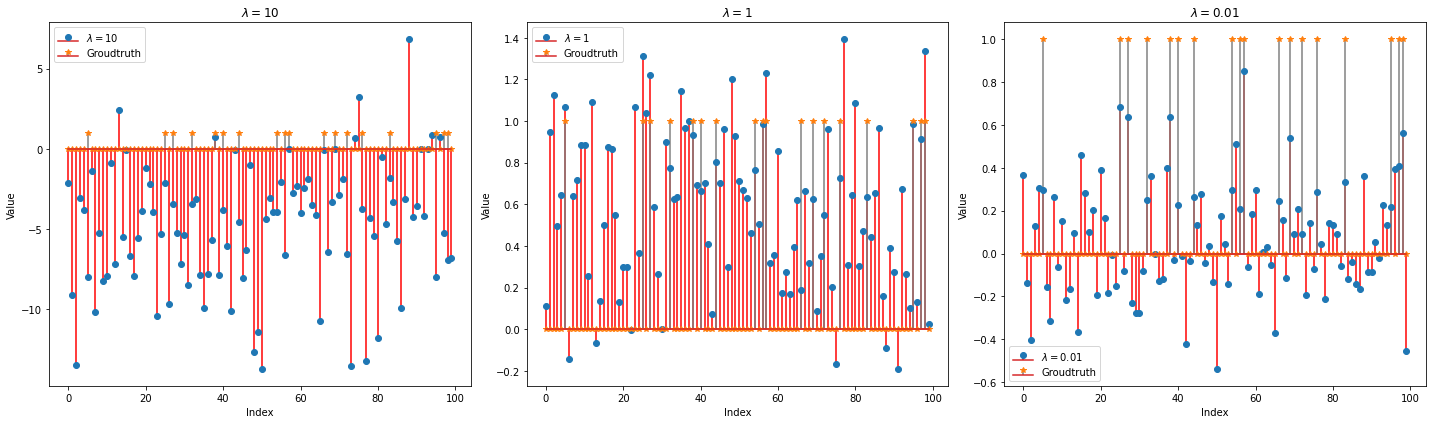

In [ ]:
fig, axs = plt.subplots(1,3);
axs = axs.flatten()
k = 0 
for col in range(3): 
    ax = axs[col]
    ax.stem(x_values[col], linefmt='red', markerfmt='o',label=rf'$\lambda = {lambda_values[col]}$',use_line_collection= True)
    ax.stem(x0, linefmt='gray', markerfmt='*',label='Groudtruth',use_line_collection= True)
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.set_title(f"$\lambda = {lambda_values[col]}$")
    ax.legend() 

fig.set_size_inches(20, 6)
fig.set_tight_layout("pad")

## d ii

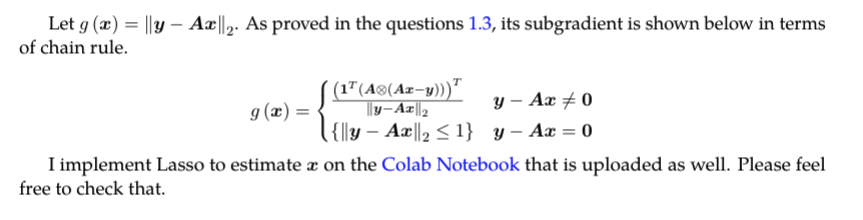

In [ ]:
# define objective function and subgradient 
def objective_function(A, x, y, la): 
  return np.linalg.norm(y - A@x) + la * np.linalg.norm(x, ord=1)

def sub_gradient_l1norm(x, value):
  data = x.copy() 
  data[data > 0] = 1
  data[data < 0] = -1
  temp  = value if value else rng.uniform(low=-1, high=1, size = 1 )
  return   np.where(data == 0, temp , data)

def sub_gradient_l2norm(A, x, y): 
  temp = A @x - y 
  
  if (temp == np.zeros_like(temp)).ravel().all(): 
    flag = True 
    print(f'Vector is 0 Find Value')
    while flag: 
      temp = rng.random(size=x.shape)
      if np.linalg.norm(A@temp - y) <= 1:
        flag = False
    return temp 
  else:
    return (np.ones(shape=(1, A.shape[0])).dot(A * (A@x - y))).T 

def objective_function_gradient(A, x, y, la, value):
  return  sub_gradient_l2norm(A,x ,y) + la*sub_gradient_l1norm(x, value) 


In [ ]:
def train(A, x, x0, y, la, value=0.6, threshold=1e-9, step_size=1e-3):

  
  delta = np.abs(objective_function(A, x, y, la)) 

  k=1
  while delta > threshold: 
    last = objective_function(A, x, y, la)

    x -=  (step_size/np.square(k)) *  objective_function_gradient(A, x, y, la, value)

    current = objective_function(A, x, y, la) 
    delta = np.abs(current - last)  

    if (k-1) % 500 == 0: 

      loss = np.linalg.norm(x - x0)**2 
      print(f"Iter {k} Loss: {loss}")    
    
    k +=1
  return x 

Try $\lambda = 10, 1, 1e-2$. Get best performace when $\lambda = 1e-2$

In [ ]:
rng = np.random.default_rng(seed=42)
N, d, p = 30, 100, .2
A = rng.standard_normal(size = (N, d))
epsilon = rng.normal(loc=0, scale=.5, size=(N, 1))
x0 = rng.binomial(1, p , d).reshape(d, -1)
y = A.dot(x0) + epsilon


In [ ]:
lambda_values = [10, 1 , 1e-2,]

x_values = [] 
for lambda_value in lambda_values:
  x = np.zeros(shape=(100,1)) 
  x = train(A, x, x0, y, lambda_value, value= None, threshold=1e-4,  step_size=1)
  x_values.append(x)
  print(f'lambda value: {lambda_value} End\n')

Iter 1 Loss: 82203.28891718033
Iter 101 Loss: 4097.278004235519
Iter 201 Loss: 4045.1789936502473
Iter 301 Loss: 4027.7333271720095
Iter 401 Loss: 4018.9947684050985
Iter 501 Loss: 4013.7469811206283
Iter 601 Loss: 4010.246388370224
Iter 701 Loss: 4007.7448628186876
Iter 801 Loss: 4005.86823733321
Iter 901 Loss: 4004.4082058554145
Iter 1001 Loss: 4003.2400657485628
Iter 1101 Loss: 4002.2841066068713
Iter 1201 Loss: 4001.4874416166926
Iter 1301 Loss: 4000.813246352783
Iter 1401 Loss: 4000.2353162754384
Iter 1501 Loss: 3999.734407408353
Iter 1601 Loss: 3999.2961001168164
Iter 1701 Loss: 3998.909307709766
Iter 1801 Loss: 3998.565489207076
Iter 1901 Loss: 3998.257848588832
Iter 2001 Loss: 3997.980961141197
Iter 2101 Loss: 3997.7304350184213
Iter 2201 Loss: 3997.5026766347064
Iter 2301 Loss: 3997.294709630891
Iter 2401 Loss: 3997.1040825863474
Iter 2501 Loss: 3996.9286943719126
Iter 2601 Loss: 3996.766793884421
Iter 2701 Loss: 3996.6168773579648
Iter 2801 Loss: 3996.4776770012545
Iter 2901 

<StemContainer object of 3 artists>

<StemContainer object of 3 artists>

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, '$\\lambda = 10$')

<StemContainer object of 3 artists>

<StemContainer object of 3 artists>

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, '$\\lambda = 1$')

<StemContainer object of 3 artists>

<StemContainer object of 3 artists>

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, '$\\lambda = 0.01$')

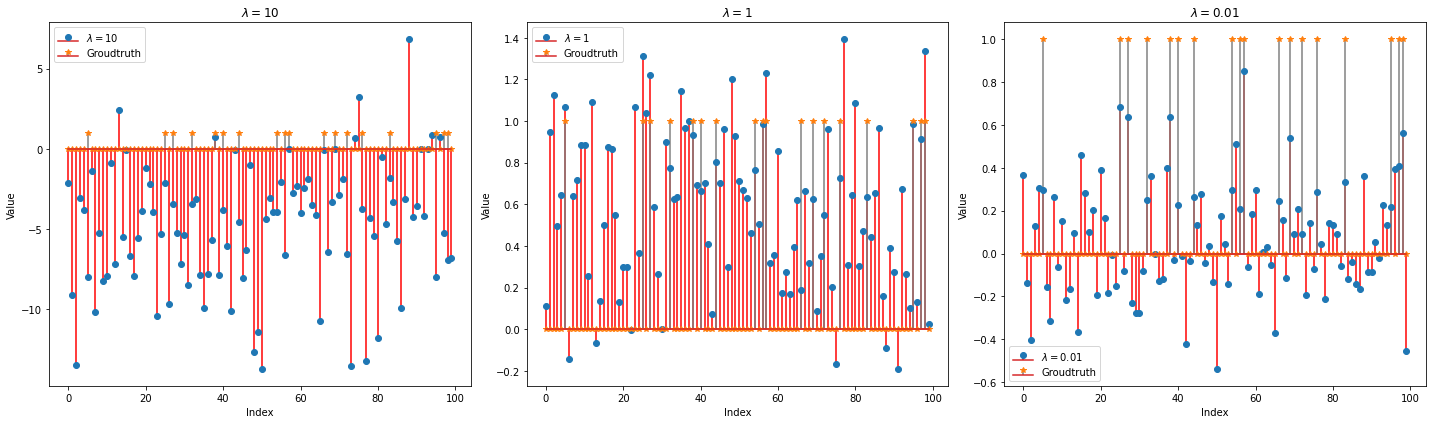

In [ ]:

fig, axs = plt.subplots(1,3);
axs = axs.flatten()
k = 0 
for col in range(3): 
    ax = axs[col]
    ax.stem(x_values[col], linefmt='red', markerfmt='o',label=rf'$\lambda = {lambda_values[col]}$',use_line_collection= True)
    ax.stem(x0, linefmt='gray', markerfmt='*',label='Groudtruth',use_line_collection= True)
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.set_title(f"$\lambda = {lambda_values[col]}$")
    ax.legend() 

fig.set_size_inches(20, 6)
fig.set_tight_layout("pad")

## d iii

In [ ]:
# Creat lasso 
def lasso_train(A, x, x0, y, la, value=0.6, threshold=1e-9, step_size=1e-3):

  def objective_function(A, x, y, la): 
    return 0.5 * np.linalg.norm(y - A@x)**2 + la * np.linalg.norm(x, ord=1)

  def sub_gradient_l1norm(x, value):
    data = x.copy() 
    data[data > 0] = 1
    data[data < 0] = -1
    temp  = value if value else rng.uniform(low=-1, high=1, size = 1 )
    return   np.where(data == 0, temp , data)

  def objective_function_gradient(A, x, y, la, value):
    return  A.T.dot(A@x - y) + la*sub_gradient_l1norm(x, value) 

  delta = np.abs(objective_function(A, x, y, la)) 

  k=1
  while delta > threshold: 
    last = objective_function(A, x, y, la)

    x -=  (step_size/np.square(k)) *  objective_function_gradient(A, x, y, la, value)

    current = objective_function(A, x, y, la) 
    delta = np.abs(current - last)  

    if (k-1) % 500 == 0: 

      loss = np.linalg.norm(x - x0)**2 

      print(f"Iter {k} Loss: {loss}")    
    
    k +=1
  return x 





Try $\sigma^2 = 0.7, 2, 4$. Get the best performance when $\sigma^2 = 0.7$

In [ ]:
for var in [0.7, 2, 4]:

  rng = np.random.default_rng(seed=42)
  N, d, p = 30, 100, .2
  A = rng.standard_normal(size = (N, d))

  epsilon = rng.normal(loc=0, scale=var, size=(N, 1))

  x0 = rng.binomial(1, p , d).reshape(d, -1)
  y = A.dot(x0) + epsilon


  lambda_value = 1e-2

  x = np.zeros(shape=(100,1)) 
  x = lasso_train(A, x, x0, y, lambda_value, value= None, threshold=1e-4,  step_size=1)

  print(f'Variance value: {var} End\n')

Iter 1 Loss: 85440.59010746662
Iter 501 Loss: 11.741290783322153
Variance value: 0.7 End

Iter 1 Loss: 101189.2343090654
Iter 501 Loss: 14.133128880192148
Variance value: 2 End

Iter 1 Loss: 139868.17518044726
Iter 501 Loss: 22.266508121325753
Variance value: 4 End



In [ ]:
# create square root Lasso
def square_root_train(A, x, x0, y, la, value=0.6, threshold=1e-9, step_size=1e-3):

  def objective_function(A, x, y, la): 
    return np.linalg.norm(y - A@x) + la * np.linalg.norm(x, ord=1)

  def sub_gradient_l1norm(x, value):
    data = x.copy() 
    data[data > 0] = 1
    data[data < 0] = -1
    temp  = value if value else rng.uniform(low=-1, high=1, size = 1 )
    return   np.where(data == 0, temp , data)

  def sub_gradient_l2norm(A, x, y): 
    temp = A @x - y 
    
    if (temp == np.zeros_like(temp)).ravel().all(): 
      flag = True 
      print(f'Vector is 0 Find Value')
      while flag: 
        temp = rng.random(size=x.shape)
        if np.linalg.norm(A@temp - y) <= 1:
          flag = False
      return temp 
    else:
      return (np.ones(shape=(1, A.shape[0])).dot(A * (A@x - y))).T 

  def objective_function_gradient(A, x, y, la, value):
    return  sub_gradient_l2norm(A,x ,y) + la*sub_gradient_l1norm(x, value) 


  
  delta = np.abs(objective_function(A, x, y, la)) 

  k=1
  while delta > threshold: 
    last = objective_function(A, x, y, la)

    x -=  (step_size/np.square(k)) *  objective_function_gradient(A, x, y, la, value)

    current = objective_function(A, x, y, la) 
    delta = np.abs(current - last)  

    if (k-1) % 500 == 0: 

      loss = np.linalg.norm(x - x0)**2 

      print(f"Iter {k} Loss: {loss}")    
    
    k +=1
  return x 

Try $\sigma^2 = 0.7, 2, 4$. Get the best performance when $\sigma^2 = 0.7$

In [ ]:
for var in [0.7, 2, 4]:

  rng = np.random.default_rng(seed=42)
  N, d, p = 30, 100, .2
  A = rng.standard_normal(size = (N, d))

  epsilon = rng.normal(loc=0, scale=var, size=(N, 1))

  x0 = rng.binomial(1, p , d).reshape(d, -1)
  y = A.dot(x0) + epsilon


  lambda_value = 1e-2

  x = np.zeros(shape=(100,1)) 
  x =  square_root_train(A, x, x0, y, lambda_value, value= None, threshold=1e-4,  step_size=1)

  print(f'Variance value: {var} End\n')

Iter 1 Loss: 85440.59010746662
Iter 501 Loss: 11.74129176056695
Variance value: 0.7 End

Iter 1 Loss: 101189.2343090654
Iter 501 Loss: 14.133129134926584
Variance value: 2 End

Iter 1 Loss: 139868.17518044726
Iter 501 Loss: 22.266508310754077
Variance value: 4 End

